# Problem Statement

BigMart Sales Data provides a detailed view of retail operations, including item specifics, outlet details, and sales labels. This dataset empowers businesses to strategically tailor product modifications and marketing efforts by understanding customer preferences and optimizing resources based on outlet types and sales trends.

With insights into diverse factors such as outlet size, location, and establishment year, businesses can make informed decisions to enhance customer engagement and maximize the impact of their retail strategies.

In [5]:
# Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
# Importing all the necessary libraries

# Library for modelling
import statsmodels.api as sm

# Library for train test split
from sklearn.model_selection import train_test_split

# Library for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

# Library for scaling
from sklearn.preprocessing import MinMaxScaler

# Library for Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [13]:
#Reading the data set
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [14]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [16]:
#Adding a ‘source’ column specifying where each observation belongs
train['source']='train'
test['source']='test'

#combining the dataframes into one dataset
data = pd.concat([train, test],ignore_index=True)

print(train.shape, test.shape, data.shape)


(8523, 13) (5681, 12) (14204, 13)


# Observations:

We see that in Train dataset we have 12 columns and in Test dataset we have 11 columns.

In Test dataset 'Item_Outlet_Sales' is not present as this column is our target feature.

We combined both train and test data sets into one and will perform feature engineering and then divide them later again.

In [19]:
#Checking the first 5 rows of the data set
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [20]:
#Determining the shape of the datset
data.shape

(14204, 13)

In [21]:
#Inspecting the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [22]:
#Checking for count of missing values in each column
(data.isnull().sum())

,0
Item_Identifier,0
Item_Weight,2439
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,4016
Outlet_Location_Type,0


In [23]:
#Lets look at some basic statistics for numerical variables

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
#Lets look at number of unique values in categorical columns

data.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,13006
Item_Type,16
Item_MRP,8052
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


# Data Cleaning and EDA


We will explore all the variables excluding the ID's column and 'source' column.



In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

***'Item_Weight' column:***

In [26]:
# checking the number of missing values
data.Item_Weight.isnull().sum()

2439

In [27]:
data["Item_Weight"].fillna(data.groupby(by ='Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)

#Checking the number of missing values
data.Item_Weight.isnull().sum()

0

***'Item_Fat_Content' column:***

In [28]:
# checking the count of values
data.Item_Fat_Content.value_counts()

,count
Item_Fat_Content,
Low Fat,8485
Regular,4824
LF,522
reg,195
low fat,178


In [29]:
#replacing 'LF' and 'low fat' with 'Low Fat'
#replacing 'reg' with 'Regular'
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

# checking if replacement has taken place or not
data.Item_Fat_Content.value_counts()

,count
Item_Fat_Content,
Low Fat,9185
Regular,5019


## ***'Item_Visibility' column:***


We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.

In [30]:
#Replacing 0 with 'NaN'
data['Item_Visibility'] = data['Item_Visibility'].replace(0,np.NaN)

#imputing the mean visibility of that product
data['Item_Visibility'].fillna(data.groupby(by ='Item_Identifier')['Item_Visibility'].transform('mean'),inplace = True)

#Checking the number of missing values
data.Item_Visibility.isnull().sum()


0

***'Item_Type' column***

In [31]:
# checking the count of values
data.Item_Type.value_counts()

,count
Item_Type,
Fruits and Vegetables,2013
Snack Foods,1989
Household,1548
Frozen Foods,1426
Dairy,1136
Baking Goods,1086
Canned,1084
Health and Hygiene,858
Meat,736


# Observations:

There are 16 different categories of items which shall not be very useful in analysis.

We shall combine them either manually or by a catch being found.
If we look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC.

 If we see the categories, these look like being Food, Drinks and Non-Consumables.

So I’ve used the Item_Identifier variable to create a new column.


In [32]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

# checking the count of values
data['Item_Type_Combined'].value_counts()


,count
Item_Type_Combined,
Food,10201
Non-Consumable,2686
Drinks,1317


In [33]:
#creating a separate category for non-consumable products in fat content column

data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,6499
Regular,5019
Non-Edible,2686


In [34]:
# checking the count of values
data.Outlet_Size.value_counts()

,count
Outlet_Size,
Medium,4655
Small,3980
High,1553


In [35]:
# checking the count of values
data.Outlet_Location_Type.value_counts()


,count
Outlet_Location_Type,
Tier 3,5583
Tier 2,4641
Tier 1,3980


In [36]:
# checking the count of values
data.Outlet_Type.value_counts()

,count
Outlet_Type,
Supermarket Type1,9294
Grocery Store,1805
Supermarket Type3,1559
Supermarket Type2,1546


In [37]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

,Outlet_Years
count,14204.000000
mean,15.169319
std,8.371664
min,4.000000
25%,9.000000
50%,14.000000
75%,26.000000
max,28.000000


# Data Visualisation

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  Item_Type_Combined         14204 non-null  obj

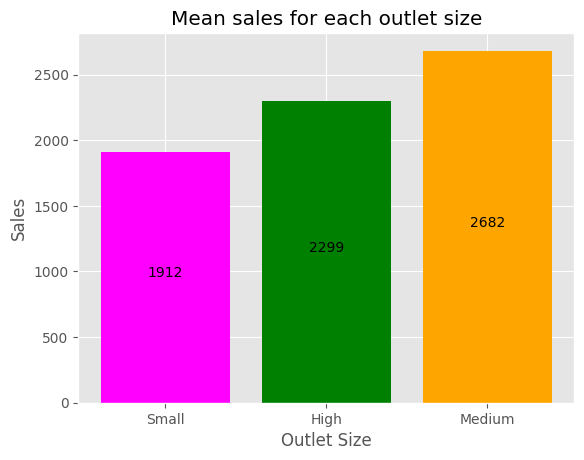

In [39]:
# sales by outlet size
sales_by_outlet_size = data.groupby('Outlet_Size').Item_Outlet_Sales.mean()

# sort by sales
sales_by_outlet_size.sort_values(inplace=True)

x = sales_by_outlet_size.index.tolist()
y = sales_by_outlet_size.values.tolist()

plt.style.use('ggplot')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i]), ha = 'center')

# set axis labels
plt.xlabel('Outlet Size')
plt.ylabel('Sales')

# set title
plt.title('Mean sales for each outlet size')

# set xticks
plt.xticks(labels=x, ticks=np.arange(len(x)))

ax = plt.bar(x,y, color =['magenta','green','orange'])


# calling the function to add value labels
addlabels(x, y)

plt.show()


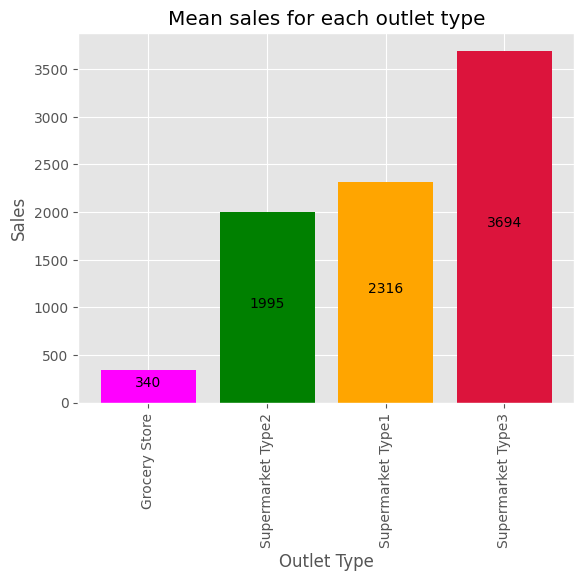

In [40]:
# sales by outlet type
sales_by_outlet_type = data.groupby('Outlet_Type').Item_Outlet_Sales.mean()

# sort by sales
sales_by_outlet_type.sort_values(inplace=True)

x = sales_by_outlet_type.index.tolist()
y = sales_by_outlet_type.values.tolist()

plt.style.use('ggplot')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i]), ha = 'center')

# set axis labels
plt.xlabel('Outlet Type')
plt.ylabel('Sales')

# set title
plt.title('Mean sales for each outlet type')

# set xticks
plt.xticks(labels=x, ticks=np.arange(len(x)), rotation = 90)

ax = plt.bar(x,y, color =['magenta','green','orange','crimson'])


# calling the function to add value labels
addlabels(x, y)

plt.show()

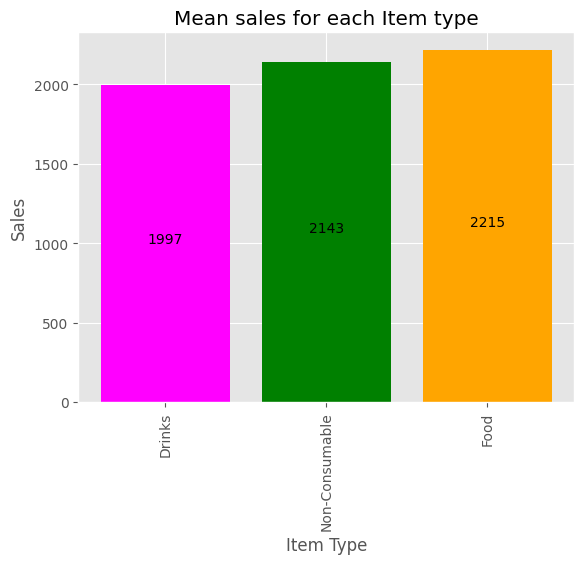

In [41]:
# sales by outlet type
sales_by_Item_Type = data.groupby('Item_Type_Combined').Item_Outlet_Sales.mean()

# sort by sales
sales_by_Item_Type.sort_values(inplace=True)

x = sales_by_Item_Type.index.tolist()
y = sales_by_Item_Type.values.tolist()

plt.style.use('ggplot')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i]), ha = 'center')

# set axis labels
plt.xlabel('Item Type')
plt.ylabel('Sales')

# set title
plt.title('Mean sales for each Item type')

# set xticks
plt.xticks(labels=x, ticks=np.arange(len(x)), rotation = 90)

ax = plt.bar(x,y, color =['magenta','green','orange','crimson'])


# calling the function to add value labels
addlabels(x, y)

plt.show()

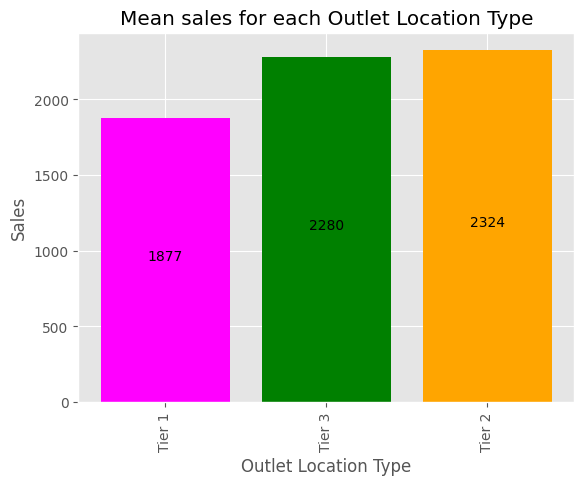

In [42]:
# sales by outlet location type
sales_by_Outlet_Location_Type = data.groupby('Outlet_Location_Type').Item_Outlet_Sales.mean()

# sort by sales
sales_by_Outlet_Location_Type.sort_values(inplace=True)

x = sales_by_Outlet_Location_Type.index.tolist()
y = sales_by_Outlet_Location_Type.values.tolist()

plt.style.use('ggplot')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i]), ha = 'center')

# set axis labels
plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')

# set title
plt.title('Mean sales for each Outlet Location Type')

# set xticks
plt.xticks(labels=x, ticks=np.arange(len(x)), rotation = 90)

ax = plt.bar(x,y, color =['magenta','green','orange','crimson'])


# calling the function to add value labels
addlabels(x, y)

plt.show()

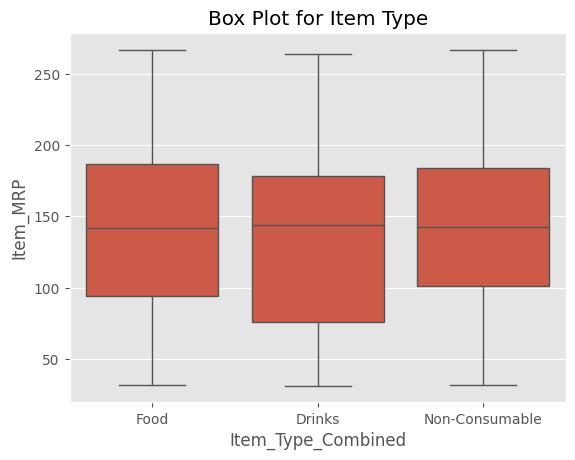

In [43]:
# set title
plt.title('Box Plot for Item Type')


sns.boxplot(x="Item_Type_Combined", y="Item_MRP", data=data)
plt.show()


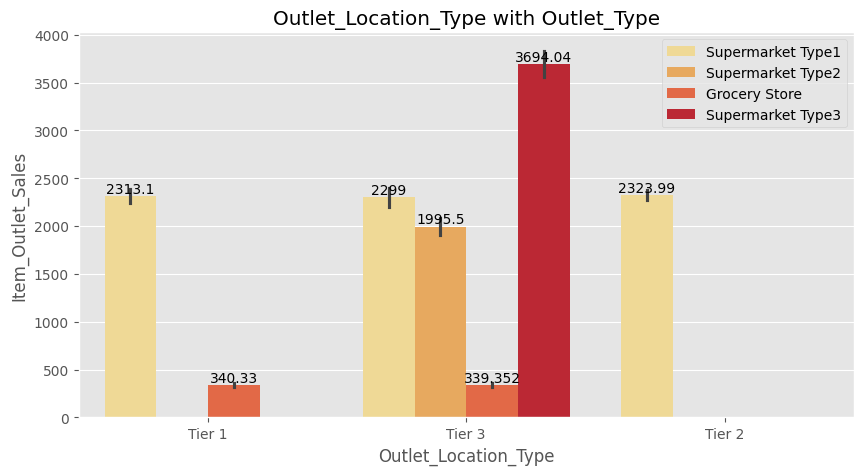

In [44]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'Outlet_Location_Type',y ='Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='YlOrRd',estimator = 'mean')


for i in ax.containers:
    ax.bar_label(i,)


plt.title('Outlet_Location_Type with Outlet_Type')
plt.legend()
plt.show()

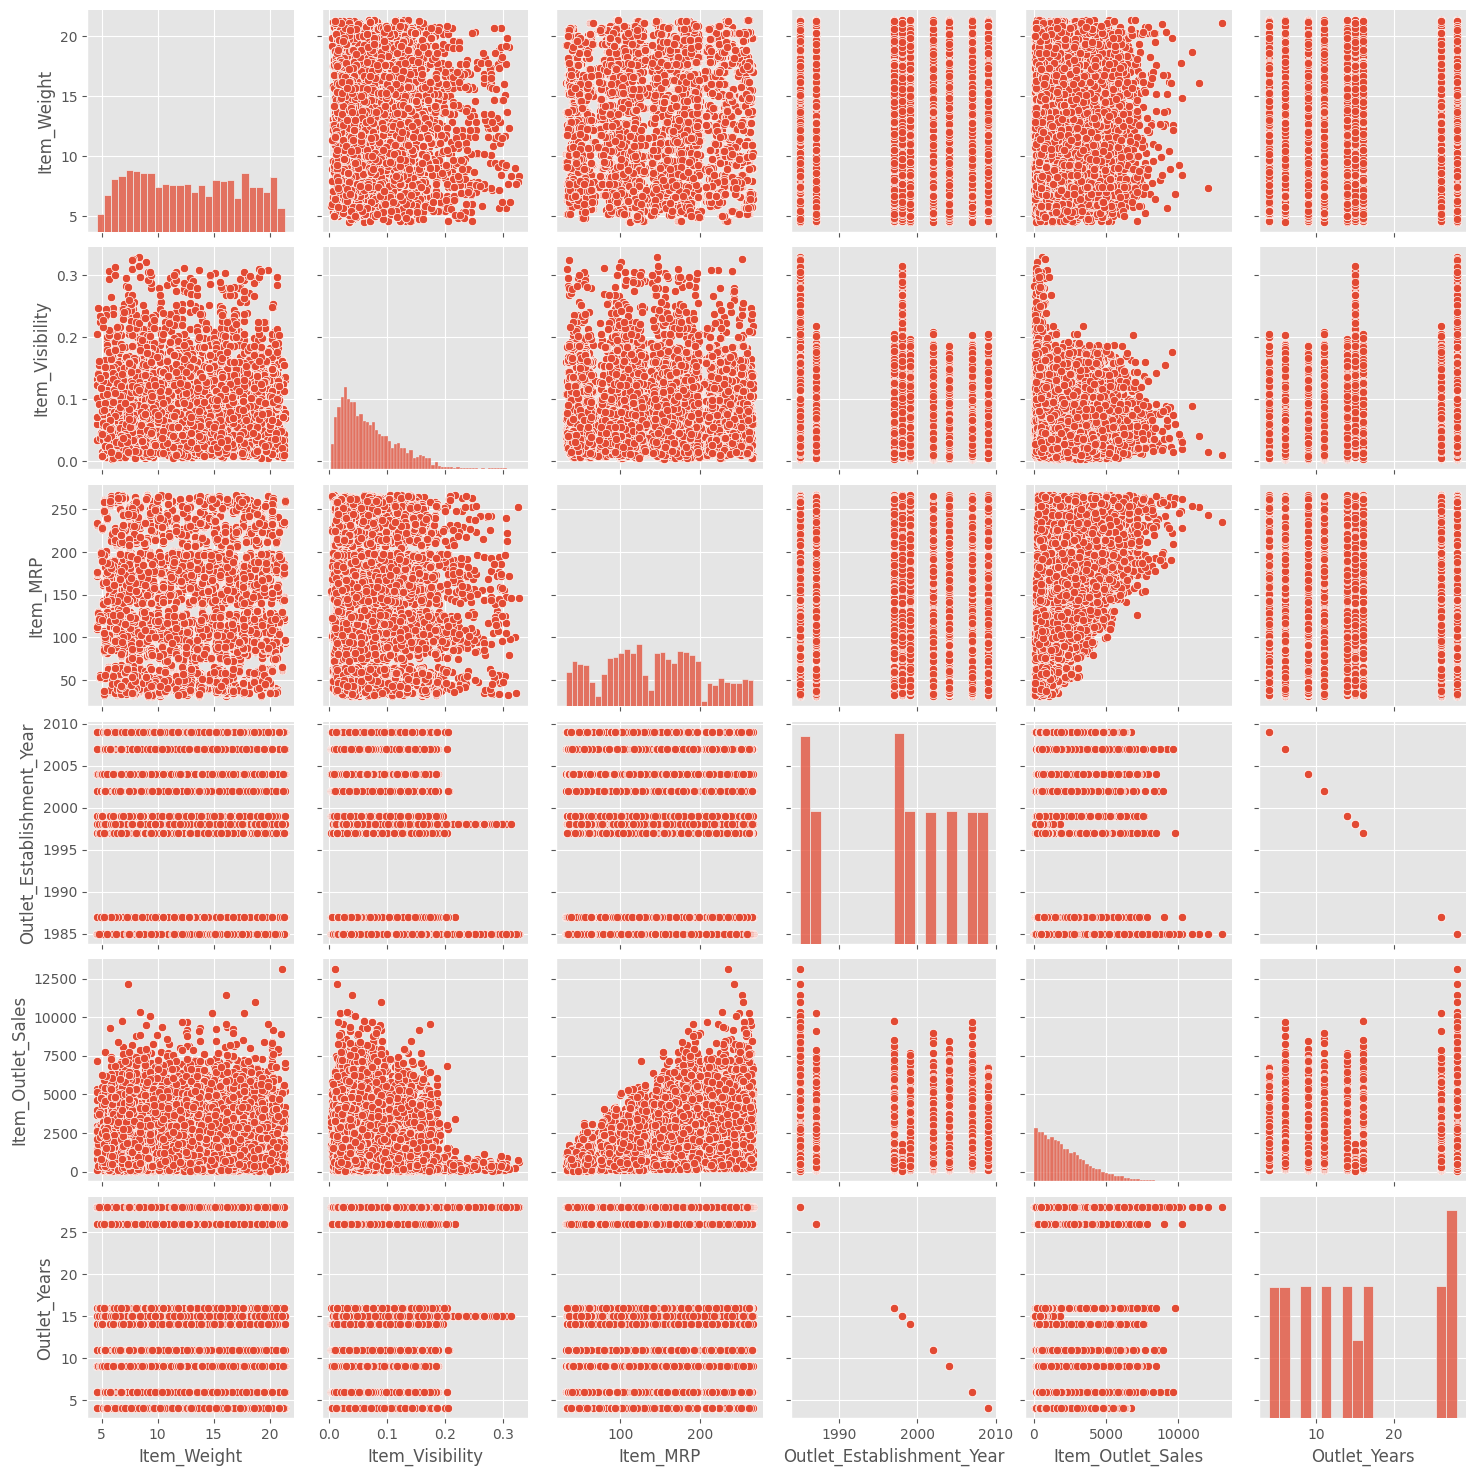

In [46]:
sns.pairplot(data)
plt.show()

# Categorical Encoding: creation of dummy variables

In [48]:
#First creating a list of categorical columns

categorical_cols = []
for col in data.columns:
    if data[col].dtype == 'object':
        categorical_cols.append(col)

print(categorical_cols)


['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source', 'Item_Type_Combined']


In [49]:
#creating list of categorical variables whose dummies are required

cat_cols = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined']


In [50]:
#Creating Dummies for the categorical variables

for col in cat_cols:
    dummies = pd.get_dummies(data[col], prefix=col, prefix_sep='_', drop_first=True, dtype=int)
    data = pd.concat([data, dummies], axis=1)
    data.drop(columns=[col], inplace=True)

data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,Item_Fat_Content_Non-Edible,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,1999,3735.1380,train,14,0,...,1,1,0,0,0,1,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,2009,443.4228,train,4,0,...,0,1,0,0,1,0,1,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,1999,2097.2700,train,14,0,...,1,1,0,0,0,1,0,0,1,0
3,FDX07,19.20,0.022930,Fruits and Vegetables,182.0950,1998,732.3800,train,15,0,...,0,0,0,0,1,0,0,0,1,0
4,NCD19,8.93,0.014670,Household,53.8614,1987,994.7052,train,26,1,...,0,0,0,0,1,1,0,0,0,1


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Identifier                    14204 non-null  object 
 1   Item_Weight                        14204 non-null  float64
 2   Item_Visibility                    14204 non-null  float64
 3   Item_Type                          14204 non-null  object 
 4   Item_MRP                           14204 non-null  float64
 5   Outlet_Establishment_Year          14204 non-null  int64  
 6   Item_Outlet_Sales                  8523 non-null   float64
 7   source                             14204 non-null  object 
 8   Outlet_Years                       14204 non-null  int64  
 9   Item_Fat_Content_Non-Edible        14204 non-null  int64  
 10  Item_Fat_Content_Regular           14204 non-null  int64  
 11  Outlet_Identifier_OUT013           14204 non-null  int

We have prepared the data for modelling. Before Modelling we need to export the data back into train and test data sets. I

In [52]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)


In [53]:
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
8523,FDW58,20.750,0.007565,107.8622,NaN,14,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
8524,FDW14,8.300,0.038428,87.3198,NaN,6,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
8525,NCN55,14.600,0.099575,241.7538,NaN,15,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8526,FDQ58,7.315,0.015388,155.0340,NaN,6,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
8527,FDY38,13.600,0.118599,234.2300,NaN,28,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0


In [54]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0.016047,249.8092,3735.1380,14,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,443.4228,4,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
2,FDN15,17.50,0.016760,141.6180,2097.2700,14,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,FDX07,19.20,0.022930,182.0950,732.3800,15,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,NCD19,8.93,0.014670,53.8614,994.7052,26,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1


# We will split the data into Training and Test datasets

In [55]:
# Putting Target variable to y
y = train['Item_Outlet_Sales']

# Putting predictor variables to X
X = train.drop(['Item_Outlet_Sales','Item_Identifier'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [56]:
#shape of test and test data sets after split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5966, 24)
(2557, 24)
(5966,)
(2557,)


# Feature Scaling

In [57]:
scaler = MinMaxScaler()

#creating a list of numeric variables

num_col = ['Item_Weight','Item_MRP','Outlet_Years']

X_train[num_col] = scaler.fit_transform(X_train[num_col])

# X-train dataframe after standard scaling
X_train.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
4122,0.082763,0.093171,0.407289,0.416667,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
6590,0.088121,0.141138,0.525109,0.916667,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
5460,0.541530,0.048980,0.497943,1.000000,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
4541,0.443287,0.075702,0.395707,0.291667,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4186,0.359929,0.035248,0.226137,0.416667,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1


We can see that our target variable 'sales' has high correlation with 'MRP'.

Now the number of variables is 24, which is pretty high. So we shall use hybrid method of modelling. We will first use Automatic method to reduce the number of variables from 24 to 12 and then use Manual method to reduce further.

We will be checking VIF again and again so we shall create a function for checking.
d

In [59]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# Model 1: Model Building using all the variables

In [60]:
# Adding the constant

X_train_lm1 = sm.add_constant(X_train)

#Fit Ordinary Least Squares (OLS) regression model

lr_1 = sm.OLS(y_train,X_train_lm1).fit()

lr_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     521.3
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:11:20   Log-Likelihood:                -50395.
No. Observations:                5966   AIC:                         1.008e+05
Df Residuals:                    5950   BIC:                         1.009e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -5.21e+14   1.09e+15     -0.477      0.633   -2.66e+15    1.62e+15
Item_Weight                          15.9952     53.050      0.302      0.763     -88.002     119.993
Item_Visibility                    -140.8409    306.379     -0.460      0.646    -741.456     459.774
Item_MRP                           3674.6804     55.188     66.584      0.000    3566.491    3782.869
Outlet_Years                       5.882e+14   1.23e+15      0.477      0.633   -1.83e+15       3e+15
Item_Fat_Content_Non-Edible         1.36e+13   2.85e+13      0.477      0.633   -4.23e+13    6.95e+13
Item_Fat_Content_Regular             82.7594     33.838      2.446      0.014      16.425     149.093
Outlet_Identifier_OUT013          -1.586e+15   3.32e+15     -0.477      0.633    -8.1e+15    4.93e+15
Outlet_Identifier_OUT017          -2.031e+14   4.26e+14     -0.477      0.633   -1.04e+15    6.31e+14
Outlet_Identifier_OUT018           3.349e+14   7.02e+14      0.477      0.633   -1.04e+15    1.71e+15
Outlet_Identifier_OUT019           4.373e+14   9.16e+14      0.477      0.633   -1.36e+15    2.23e+15
Outlet_Identifier_OUT027           5.759e+13   1.21e+14      0.477      0.633   -1.79e+14    2.94e+14
Outlet_Identifier_OUT035           2.278e+14   4.77e+14      0.477      0.633   -7.08e+14    1.16e+15
Outlet_Identifier_OUT045          -3.257e+14   6.82e+14     -0.477      0.633   -1.66e+15    1.01e+15
Outlet_Identifier_OUT046          -5.845e+14   1.22e+15     -0.477      0.633   -2.99e+15    1.82e+15
Outlet_Identifier_OUT049          -6.496e+14   1.36e+15     -0.477      0.633   -3.32e+15    2.02e+15
Outlet_Size_Medium                -3.904e+14   8.18e+14     -0.477      0.633   -1.99e+15    1.21e+15
Outlet_Size_Small                 -5.045e+14   1.06e+15     -0.477      0.633   -2.58e+15    1.57e+15
Outlet_Location_Type_Tier 2       -6.408e+14   1.34e+15     -0.477      0.633   -3.27e+15    1.99e+15
Outlet_Location_Type_Tier 3        2.514e+14   5.27e+14      0.477      0.633   -7.81e+14    1.28e+15
Outlet_Type_Supermarket Type1      1.316e+15   2.76e+15      0.477      0.633   -4.09e+15    6.72e+15
Outlet_Type_Supermarket Type2      3.251e+14   6.81e+14      0.477      0.633   -1.01e+15    1.66e+15
Outlet_Type_Supermarket Type3       1.42e+13   2.97e+13      0.477      0.633   -4.41e+13    7.25e+13
Item_Type_Combined_Food              18.8946     53.510      0.353      0.724     -86.005     123.795
Item_Type_Combined_Non-Consumable  -1.36e+13   2.85e+13     -0.477      0.633   -6.95e+13    4.23e+13
==============================================================================
Omnibus:                      689.804   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            

In [61]:
# Calculating the VIF for the first model

calculateVIF(X_train)


,Features,VIF
12,Outlet_Identifier_OUT045,inf
11,Outlet_Identifier_OUT035,inf
21,Outlet_Type_Supermarket Type3,inf
20,Outlet_Type_Supermarket Type2,inf
19,Outlet_Type_Supermarket Type1,inf
18,Outlet_Location_Type_Tier 3,inf
17,Outlet_Location_Type_Tier 2,inf
16,Outlet_Size_Small,inf
15,Outlet_Size_Medium,inf
14,Outlet_Identifier_OUT049,inf


# Recursive Feature Elimination(RFE) - Automatic Method Of Feature Elimination

In [62]:
# Running RFE with the output number of the variable equal to 12

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select = 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [63]:
#Checking Which Variables are selected

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Item_Weight', False, 12),
 ('Item_Visibility', False, 7),
 ('Item_MRP', True, 1),
 ('Outlet_Years', True, 1),
 ('Item_Fat_Content_Non-Edible', False, 13),
 ('Item_Fat_Content_Regular', False, 8),
 ('Outlet_Identifier_OUT013', True, 1),
 ('Outlet_Identifier_OUT017', True, 1),
 ('Outlet_Identifier_OUT018', True, 1),
 ('Outlet_Identifier_OUT019', True, 1),
 ('Outlet_Identifier_OUT027', True, 1),
 ('Outlet_Identifier_OUT035', False, 6),
 ('Outlet_Identifier_OUT045', False, 9),
 ('Outlet_Identifier_OUT046', True, 1),
 ('Outlet_Identifier_OUT049', True, 1),
 ('Outlet_Size_Medium', True, 1),
 ('Outlet_Size_Small', False, 4),
 ('Outlet_Location_Type_Tier 2', False, 3),
 ('Outlet_Location_Type_Tier 3', False, 5),
 ('Outlet_Type_Supermarket Type1', True, 1),
 ('Outlet_Type_Supermarket Type2', False, 2),
 ('Outlet_Type_Supermarket Type3', True, 1),
 ('Item_Type_Combined_Food', False, 10),
 ('Item_Type_Combined_Non-Consumable', False, 11)]

In [64]:
# Selecting All Columns That RFE Has Selected

col = X_train.columns[rfe.support_]
col

Index(['Item_MRP', 'Outlet_Years', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_Medium', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [65]:
# Cheking The Columns RFE Has Not Selected

X_train.columns[~rfe.support_]


Index(['Item_Weight', 'Item_Visibility', 'Item_Fat_Content_Non-Edible',
       'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type2', 'Item_Type_Combined_Food',
       'Item_Type_Combined_Non-Consumable'],
      dtype='object')

In [66]:
# Creating X_Train Dataset With Only RFE Selected Columns

X_train_rfe = X_train[col]
X_train_rfe.head()


,Item_MRP,Outlet_Years,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
4122,0.407289,0.416667,0,0,0,0,0,0,1,1,1,0
6590,0.525109,0.916667,1,0,0,0,0,0,0,0,1,0
5460,0.497943,1.000000,0,0,0,0,1,0,0,1,0,1
4541,0.395707,0.291667,0,0,0,0,0,0,0,0,1,0
4186,0.226137,0.416667,0,0,0,0,0,0,1,1,1,0


# Model 2: Creating the model with columns selected by RFE method.

In [67]:
# Adding the constant

X_train_lm2 = sm.add_constant(X_train_rfe)


lr_2 = sm.OLS(y_train,X_train_lm2).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     780.8
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:15:06   Log-Likelihood:                -50399.
No. Observations:                5966   AIC:                         1.008e+05
Df Residuals:                    5955   BIC:                         1.009e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -474.4096    351.083     -1.351      0.177   -1162.659     213.840
Item_MRP                       3679.0482     55.118     66.749      0.000    3570.997    3787.099
Outlet_Years                  -1954.4254    751.981     -2.599      0.009   -3428.580    -480.271
Outlet_Identifier_OUT013       1292.8784    503.655      2.567      0.010     305.532    2280.225
Outlet_Identifier_OUT017       -264.3292    137.246     -1.926      0.054    -533.381       4.722
Outlet_Identifier_OUT018       -221.6707    343.485     -0.645      0.519    -895.026     451.685
Outlet_Identifier_OUT019       1080.1106    415.366      2.600      0.009     265.843    1894.379
Outlet_Identifier_OUT027       1734.7823    207.704      8.352      0.000    1327.608    2141.957
Outlet_Identifier_OUT046        456.8334    194.999      2.343      0.019      74.564     839.103
Outlet_Identifier_OUT049       -560.7373    137.945     -4.065      0.000    -831.160    -290.314
Outlet_Size_Medium              952.3743     32.516     29.289      0.000     888.631    1016.118
Outlet_Type_Supermarket Type1  1555.0906    168.942      9.205      0.000    1223.904    1886.277
Outlet_Type_Supermarket Type3  1734.7823    207.704      8.352      0.000    1327.608    2141.957
==============================================================================
Omnibus:                      687.745   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1705.444
Skew:                           0.667   Prob(JB):                         0.00
Kurtosis:                       5.254   Cond. No.                     1.93e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.39e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
# Calculating the VIF for the second model

calculateVIF(X_train_rfe)

,Features,VIF
4,Outlet_Identifier_OUT018,inf
6,Outlet_Identifier_OUT027,inf
8,Outlet_Identifier_OUT049,inf
9,Outlet_Size_Medium,inf
11,Outlet_Type_Supermarket Type3,inf
1,Outlet_Years,28.34
10,Outlet_Type_Supermarket Type1,6.31
5,Outlet_Identifier_OUT019,5.60
2,Outlet_Identifier_OUT013,5.44
0,Item_MRP,4.02


# Validation Model on the Test set


***Feature Scaling***

In [74]:
#creating a list of numeric variables

num_col = ['Item_Weight','Item_MRP','Outlet_Years']

X_test[num_col] = scaler.transform(X_test[num_col])

# X-train dataframe after standard scaling
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
3454,0.961298,0.169667,0.645869,0.916667,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3386,0.571301,0.035470,0.955025,0.083333,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
235,0.282525,0.043574,0.685623,1.000000,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
7201,0.845192,0.052335,0.325567,0.083333,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
7782,0.508782,0.044192,0.632297,0.500000,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


# Summary:

The maximum sales are observed form Supermarket type 1 and 3.
Medium sized outlets are a great source for bigger sales.
Outlets '17', '13' and '46' impact sales a lot compared to other outlets.

Outlet '19' should be focused for improvement in sales. Either the customers are not handled well or location is not good enough for the customers to come and buy stuff.

Tier 2 cities have shown better sales compared to Tier 1 cities.
The most sold items are food items.